In [91]:
import matplotlib.pyplot as plt

# Some functions to plot our points and draw the models
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    #plt.xlabel('Sale')
    #plt.ylabel('Lottery')
    #plt.legend(['spam','ham'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y)
    plt.show()

In [68]:
# Writing the csv, but use the code below instead

df = pd.DataFrame(columns = ['x1', 'x2', 'y'])

for i in range(20):
    radius = random.random()
    angle = 2*np.pi*random.random()
    df = df.append([[np.around(radius*np.cos(angle), decimals=2),np.around(radius*np.sin(angle), decimals=2),0]])
for i in range(30):
    radius = random.random()+1
    angle = 2*np.pi*random.random()
    df = df.append([[np.around(radius*np.cos(angle), decimals=2),np.around(radius*np.sin(angle), decimals=2),1]])
df.to_csv('circular_data.csv')

In [41]:
import random
for i in range(20):
    radius = random.random()
    angle = 2*np.pi*random.random()
    print(np.around(radius*np.cos(angle), decimals=2),',',np.around(radius*np.sin(angle), decimals=2), ', 0')
for i in range(30):
    radius = random.random()+1
    angle = 2*np.pi*random.random()
    print(np.around(radius*np.cos(angle), decimals=2),',',np.around(radius*np.sin(angle), decimals=2), ', 1')

-0.7 , -0.27 , 0
0.33 , -0.53 , 0
-0.05 , -0.58 , 0
-0.38 , 0.49 , 0
0.4 , -0.87 , 0
-0.0 , -0.04 , 0
-0.07 , 0.22 , 0
0.13 , 0.0 , 0
0.49 , 0.28 , 0
0.19 , -0.02 , 0
0.32 , 0.1 , 0
-0.23 , 0.05 , 0
0.1 , -0.14 , 0
0.39 , 0.44 , 0
-0.2 , 0.04 , 0
0.83 , 0.25 , 0
0.48 , -0.78 , 0
0.23 , 0.52 , 0
0.42 , 0.24 , 0
-0.18 , 0.16 , 0
-1.32 , 0.04 , 1
-1.18 , -0.59 , 1
-0.12 , 1.49 , 1
1.12 , 0.46 , 1
0.41 , 0.95 , 1
-1.28 , -0.08 , 1
-1.76 , -0.12 , 1
-0.46 , 1.12 , 1
1.82 , 0.68 , 1
-0.59 , -1.33 , 1
0.17 , -1.51 , 1
-1.31 , -1.51 , 1
1.05 , -0.12 , 1
1.25 , -0.26 , 1
1.01 , -1.2 , 1
-1.31 , 1.3 , 1
1.97 , -0.21 , 1
-0.69 , -1.64 , 1
0.94 , 0.89 , 1
1.22 , 0.49 , 1
-1.02 , -1.1 , 1
0.27 , -1.0 , 1
-0.05 , 1.27 , 1
-0.62 , 1.86 , 1
0.89 , -0.67 , 1
0.69 , -1.36 , 1
0.82 , -0.63 , 1
-0.99 , -1.19 , 1
-0.34 , -0.98 , 1
-0.97 , -1.15 , 1


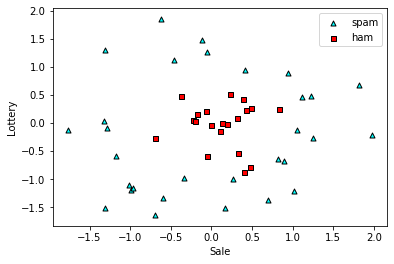

In [80]:
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv('./circular_data.csv')

features = data[['x1','x2']]
labels = data['y']

plot_points(features, labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


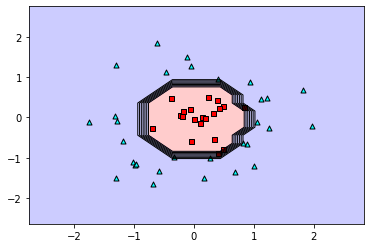

In [93]:
features = data[['x1', 'x2']]
labels = data['y']
import sklearn
svm = sklearn.svm.SVC()
svm.fit(features, labels)
svm.score(features, labels)

plot_model(features, labels, svm)